## Make landmark points of Fer2013 dataset
#### The CNN model that makes landmark is trained by [Face Images with Marked Landmark Points](https://www.kaggle.com/drgilermo/face-images-with-marked-landmark-points)  
- Face_landmark_using_CNN.ipynb  

#### FER-2013, https://www.kaggle.com/msambare/fer2013

## 0. Import Packages

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model
import os

## 1. Load models

In [109]:
model = load_model('landmark.h5')

## 2. Load Fer2013 dataset

In [124]:
label = 'sad'  ## change

In [125]:
name = os.listdir('test/' + label)

In [126]:
name_len = np.shape(name)[0]
print(name_len)

1247


In [127]:
name[0]

'PrivateTest_10247676.jpg'

In [128]:
x_test = []
for i in range(name_len):
    img = Image.open('test/'+ label + '/' + name[i]).convert("L")
    img_resize = img.resize((96,96))  # resize
    img_resize = np.array(img_resize)
    img_resize = img_resize/255  # normalize
    x_test.append(img_resize)

x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))    

In [129]:
print(x_test.shape)

(1247, 96, 96, 1)


## 3. Make predictions

In [130]:
pred = model.predict(x_test)

In [131]:
pred.shape

(1247, 30)

## 4. Test one sample

In [132]:
index = 11  # change

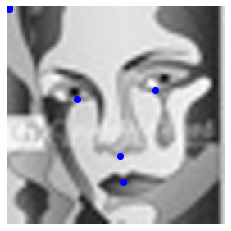

In [133]:
plt.imshow(x_test[index,:,:], cmap='gray')
plt.scatter(pred[index,:][0:-1:2], pred[index,:][1::2], c ='b')  # divide x-coordinate and y-coordinate
plt.axis("off")
plt.show()

## 5. Save landmark points

In [134]:
name[0][:-4]  # cut '.jpg' string

'PrivateTest_10247676'

In [135]:
for i in range(name_len):
    np.savetxt('land_mark/'+ label + '/' + name[i][:-4] +'.txt', pred[i])